## Movies and Beyond
### Jacob Levine
Scraping box office mojo and oscars.org. Attempting to find correlation between 'star power' of cast/director (amount of oscar wins/nominations person holds) and domestic gross total. Do these 'star power' features hold up against traditional predictors of domestic gross total such as budget, genre, rating, release period, etc?

In [2]:
import pandas as pd 
import numpy as np 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import requests 
import re
import seaborn as sns 
from pprint import pprint 
import pickle
import time
from datetime import date, datetime


%matplotlib inline

## Scraping on boxofficemojo first.

In [587]:
#First off, let's find urls for the pages we want to scrape 
#First 4 pages of movies from 2002 - 2017 by domestic total gross
url  = "http://www.boxofficemojo.com"
page1 = url+"/yearly/chart/?page=1&yr=2002&p=.htm"
page2 = url+"/yearly/chart/?page=2&yr=2002&p=.htm"
page3 = url+"/yearly/chart/?page=3&yr=2002&p=.htm"
page4 = url+"/yearly/chart/?page=4&yr=2002&p=.htm"
page5 = url+"/yearly/chart/?page=1&yr=2003&p=.htm"
page6 = url+"/yearly/chart/?page=2&yr=2003&p=.htm"
page7 = url+"/yearly/chart/?page=3&yr=2003&p=.htm"
page8 = url+"/yearly/chart/?page=4&yr=2003&p=.htm"
page9 = url+"/yearly/chart/?page=1&yr=2004&p=.htm"
page10 = url+"/yearly/chart/?page=2&yr=2004&p=.htm"
page11 = url+"/yearly/chart/?page=3&yr=2004&p=.htm"
page12 = url+"/yearly/chart/?page=4&yr=2004&p=.htm"
page13 = url+"/yearly/chart/?page=1&yr=2005&p=.htm"
page14 = url+"/yearly/chart/?page=2&yr=2005&p=.htm"
page15 = url+"/yearly/chart/?page=3&yr=2005&p=.htm"
page16 = url+"/yearly/chart/?page=4&yr=2005&p=.htm"
page17 = url+"/yearly/chart/?page=1&yr=2006&p=.htm"
page18 = url+"/yearly/chart/?page=2&yr=2006&p=.htm"
page19 = url+"/yearly/chart/?page=3&yr=2006&p=.htm"
page20 = url+"/yearly/chart/?page=4&yr=2006&p=.htm"
page21 = url+"/yearly/chart/?page=1&yr=2007&p=.htm"
page22 = url+"/yearly/chart/?page=2&yr=2007&p=.htm"
page23 = url+"/yearly/chart/?page=3&yr=2007&p=.htm"
page24 = url+"/yearly/chart/?page=4&yr=2007&p=.htm"
page25 = url+"/yearly/chart/?page=1&yr=2008&p=.htm"
page26 = url+"/yearly/chart/?page=2&yr=2008&p=.htm"
page27 = url+"/yearly/chart/?page=3&yr=2008&p=.htm"
page28 = url+"/yearly/chart/?page=4&yr=2008&p=.htm"
page29 = url+"/yearly/chart/?page=1&yr=2009&p=.htm"
page30 = url+"/yearly/chart/?page=2&yr=2009&p=.htm"
page31 = url+"/yearly/chart/?page=3&yr=2009&p=.htm"
page32 = url+"/yearly/chart/?page=4&yr=2009&p=.htm"
page33 = url+"/yearly/chart/?page=1&yr=2010&p=.htm"
page34 = url+"/yearly/chart/?page=2&yr=2010&p=.htm"
page35 = url+"/yearly/chart/?page=3&yr=2010&p=.htm"
page36 = url+"/yearly/chart/?page=4&yr=2010&p=.htm"
page37 = url+"/yearly/chart/?page=1&yr=2011&p=.htm"
page38 = url+"/yearly/chart/?page=2&yr=2011&p=.htm"
page39 = url+"/yearly/chart/?page=3&yr=2011&p=.htm"
page40 = url+"/yearly/chart/?page=4&yr=2011&p=.htm"
page41 = url+"/yearly/chart/?page=1&yr=2012&p=.htm"
page42 = url+"/yearly/chart/?page=2&yr=2012&p=.htm"
page43 = url+"/yearly/chart/?page=3&yr=2012&p=.htm"
page44 = url+"/yearly/chart/?page=4&yr=2012&p=.htm"
page45 = url+"/yearly/chart/?page=1&yr=2013&p=.htm"
page46 = url+"/yearly/chart/?page=2&yr=2013&p=.htm"
page47 = url+"/yearly/chart/?page=3&yr=2013&p=.htm"
page48 = url+"/yearly/chart/?page=4&yr=2013&p=.htm"
page49 = url+"/yearly/chart/?page=1&yr=2014&p=.htm"
page50 = url+"/yearly/chart/?page=2&yr=2014&p=.htm"
page51 = url+"/yearly/chart/?page=3&yr=2014&p=.htm"
page52 = url+"/yearly/chart/?page=4&yr=2014&p=.htm"
page53 = url+"/yearly/chart/?page=1&yr=2015&p=.htm"
page54 = url+"/yearly/chart/?page=2&yr=2015&p=.htm"
page55 = url+"/yearly/chart/?page=3&yr=2015&p=.htm"
page56 = url+"/yearly/chart/?page=4&yr=2015&p=.htm"
page57 = url+"/yearly/chart/?page=1&yr=2016&p=.htm"
page58 = url+"/yearly/chart/?page=2&yr=2016&p=.htm"
page59 = url+"/yearly/chart/?page=3&yr=2016&p=.htm"
page60 = url+"/yearly/chart/?page=4&yr=2016&p=.htm"
page61 = url+"/yearly/chart/?page=1&yr=2017&p=.htm"
page62 = url+"/yearly/chart/?page=2&yr=2017&p=.htm"
page63 = url+"/yearly/chart/?page=3&yr=2017&p=.htm"
page64 = url+"/yearly/chart/?page=4&yr=2017&p=.htm"

#Add all urls to a list 
page_url_list = [page1, page2, page3, page4, page5, page6, page7, page8, page9, page10, page11, page12, 
                 page13, page14, page15, page16, page17, page18, page19, page20, page21, page22, page23, 
                 page24, page25, page26, page27, page28, page29, page30, page31, page32, page33, page34,
                 page35, page36, page37, page38, page39, page40, page41, page42, page43, page44, page45, 
                 page46, page47, page48, page49, page50, page51, page52, page53, page54, page55, page56,
                 page57, page58, page59, page60, page61, page62, page63, page64]

In [588]:
#find individual urls for each movie we are interested in
#movie_url_list = a massive list of urls for each movie we want 
movies = 0 
movie_url_list = []
for page in page_url_list:
    res = requests.get(page)
    soup = BeautifulSoup(res.text, 'html5lib')
    for link in soup.find_all(href=re.compile(r'movies')):
        movie_link = link.get('href')
        movie_url_list.append(movie_link)
        movies += 1 
print('Scraped %d movie titles.' % movies)

Scraped 6466 movie titles.


In [722]:
"""
###PRACTICE ON AVENGERS PAGE ONLY###

#Different function required for director, producer, actors, etc. 
#these fields on boxofficemojo are hyperlinks 

def get_movie_val_list(soup, field_name):
    '''
#    Searches for appropriate href link and removes 
#    all unwanted characters. Returns only elements 
#    that are needed. 
    '''
    obj = soup.find(href=re.compile(field_name))
    if obj:
        obj2 = obj.find_next('td')
        if obj2:
            obj3 = re.compile(r'<.*?>').sub('^', str(obj2))  #nongreedy matching
            obj4 = obj3.split('^')            
            val_list1 = [i.strip(' * ') for i in obj4 if i.strip()]            
            final_list = [i for i in val_list1 if "(" not in i and ")" not in i]        
            return final_list


avengers_url = 'http://www.boxofficemojo.com/movies/?id=avengers11.htm'

r = requests.get(avengers_url)
soup = BeautifulSoup(r.text, 'html5lib')

#getting title 
soup.find('title').text.split('(')[0].strip()
dtg = get_movie_value(soup, "Domestic Total")
get_movie_value(soup, "Director")

print(get_movie_value(soup, 'Production Budget'))

##### PRACTICE ######
"""

'\n###PRACTICE ON AVENGERS PAGE ONLY###\n\n#Different function required for director, producer, actors, etc. \n#these fields on boxofficemojo are hyperlinks \n\ndef get_movie_val_list(soup, field_name):\n    \'\'\'\n#    Searches for appropriate href link and removes \n#    all unwanted characters. Returns only elements \n#    that are needed. \n    \'\'\'\n    obj = soup.find(href=re.compile(field_name))\n    if obj:\n        obj2 = obj.find_next(\'td\')\n        if obj2:\n            obj3 = re.compile(r\'<.*?>\').sub(\'^\', str(obj2))  #nongreedy matching\n            obj4 = obj3.split(\'^\')            \n            val_list1 = [i.strip(\' * \') for i in obj4 if i.strip()]            \n            final_list = [i for i in val_list1 if "(" not in i and ")" not in i]        \n            return final_list\n\n\navengers_url = \'http://www.boxofficemojo.com/movies/?id=avengers11.htm\'\n\nr = requests.get(avengers_url)\nsoup = BeautifulSoup(r.text, \'html5lib\')\n\n#getting title \nsoup.

_________

In [236]:
#Use Text Matching Method for scraping on individual movie pages 
def get_movie_value(soup, field_name):
    '''
    Takes string attribute of a movie on the page and
    returns the string in the next sibling object
    (the value for that attribute). Return None 
    if nothing is found. 
    '''
    obj = soup.find(text=re.compile(field_name))
    if not obj: 
        return None
    next_sibling = obj.findNextSibling()
    if next_sibling:
        return next_sibling.text 
    else:
        return None

#Different function required for director, producer, actors, etc. 
#these fields on boxofficemojo are hyperlinks 
def get_movie_val_list(soup, field_name):
    '''
    Searches for appropriate href link and removes 
    all unwanted characters. Returns only elements 
    that are needed. 
    '''
    obj = soup.find(href=re.compile(field_name))
    if obj:
        obj2 = obj.find_next('td')
        if obj2:
            obj3 = re.compile(r'<.*?>').sub('^', str(obj2))  #nongreedy matching
            obj4 = obj3.split('^')            
            val_list1 = [i.strip(' * ') for i in obj4 if i.strip()]            
            final_list = [i for i in val_list1 if "(" not in i and ")" not in i]        
            return final_list

In [589]:
#need to access each movie_url we scraped, get important info for each individual movie 
#store information we need in a dict 

index = 0
total_movie_info = {}

for extension in movie_url_list:
    movie_url = url + extension
    r = requests.get(movie_url)
    soup = BeautifulSoup(r.text, 'html5lib')
    """
    Start searching each individual movie 
    page for the information that we want.
    """
    titles = soup.find('title').text.split('(')[0].strip()
    DTG = get_movie_value(soup, 'Domestic Total')
    distributor = get_movie_value(soup, 'Distributor')
    release_date = get_movie_value(soup, 'Release Date')
    genre = get_movie_value(soup, 'Genre:')
    runtime = get_movie_value(soup, 'Runtime')
    rating = get_movie_value(soup, 'MPAA')
    budget = get_movie_value(soup, 'Production Budget')
    #Hyperlink fields
    director = get_movie_val_list(soup, 'Director')
    writer = get_movie_val_list(soup, 'Writer')
    actors = get_movie_val_list(soup, 'Actor')
    producers = get_movie_val_list(soup, 'Producer')
    cinematographer = get_movie_val_list(soup, 'Cinematographer')
    composer = get_movie_val_list(soup, 'Composer')
    
    index += 1
    movie_dict = {"Title": titles, "DTG": DTG, "Distributor": distributor, "Release_Date": release_date,
                 "Genre": genre, "Runtime": runtime, "Rating": rating, "Budget": budget, "Director": director,
                 "Writer": writer, "Actors": actors, "Producers": producers, "Cinematographer": cinematographer,
                 "Composer": composer}
    
    total_movie_info[index] = movie_dict 

In [591]:
#pprint(total_movie_info)

In [592]:
#Save my movie dict as pickle file just in case unwanted changes are made  
with open('2002_2017_movies_dict.pkl', 'wb') as f:
    pickle.dump(total_movie_info, f)

In [505]:
with open('2002_2017_movies_dict.pkl', 'rb') as f:
    movie_dict = pickle.load(f)

## Scraping from the Oscars Website 

In [345]:
"""
###### PRACTICE ONLY ########

#practice only on oscars 2016 webpage 

twenty_sixteen = {}

res = requests.get('https://www.oscars.org/oscars/ceremonies/2016')
soup = BeautifulSoup(res.text, 'html5lib')
grouping_header_list = soup.find_all(class_='view-grouping-header')
for category in grouping_header_list:
    if 'Actor' in category.text or 'Actress' in category.text or 'Direct' in category.text:
        award_list = category.find_next_sibling()
        nominee_winner_list = []
        #must clean up text for extraneous info. other than names 
        for i in award_list.text.split('\n'):
            i_cleaned = i.strip()
            if i_cleaned and 'Winner' not in i_cleaned and 'Nominees' not in i_cleaned:
                nominee_winner_list.append(i_cleaned.strip(' '))
        twenty_sixteen[category.text] = nominee_winner_list
        
#pprint(twenty_sixteen)

###### PRACTICE ONLY ######
"""

___________


In [489]:
#I need to scrape data from the oscars.org website. Information is needed on actors, actresses, directors
#that have won or been nominated for awards. Years: 1960 - 2018 
url = 'https://www.oscars.org/oscars/ceremonies'
years = {}
for year in range(1960, 2019):
    page_url = url + '/' + str(year)
    res = requests.get(page_url)
    soup = BeautifulSoup(res.text, 'html5lib')
    current_year = {}
    grouping_header_list = soup.find_all(class_='view-grouping-header') 
    for category in grouping_header_list:
        #Search for Actors, Actresses, and Directors
        if 'Actor' in category.text or 'Actress' in category.text or 'Directing' in category.text:
            award_list = category.find_next_sibling()
            nominee_winner_list = []
            #must clean up text for extraneous info. other than names and films 
            for i in award_list.text.split('\n'):
                i_cleaned = i.strip()
                if i_cleaned and 'Winner' not in i_cleaned and 'Nominees' not in i_cleaned:
                    nominee_winner_list.append(i_cleaned.strip(' '))
            current_year[category.text] = nominee_winner_list
    years[year] = current_year
                

In [492]:
#In 'Directing' dicts, switch the director and the films so they match the order of the other dicts. 
#for year, current_year in years.items():
#    directing_awards = current_year['Directing']
#    for i in range(0, len(directing_awards), 2):
#        directing_awards[i], directing_awards[i+1] = directing_awards[i+1], directing_awards[i]
#        print(directing_awards[i], directing_awards[i+1])

In [494]:
#Next Step - Making a new dictionary out of the years dict that has the people as keys and the amount of 
#wins/nominations that they have as the values

# key: name | value: [#of wins] , [#of nominations] 

star_power_dict = {}
for year, this_year in years.items():
    for award in this_year.values():
        for i in range(0, len(award), 2):
            people = award[i].split(',') #for cases of multiple directors in one entry 
            if len(people) > 1:
                if 'Jr.' in people[1]:
                    people = [award[i]]  #merge 'Jr.' with person's name
            for j in people:
                cleaned_people = j.strip()
                if star_power_dict.get(cleaned_people):
                    wins = star_power_dict[cleaned_people][0] #intialize wins as empty list
                    nominations = star_power_dict[cleaned_people][1] #intialize nominations as empty list
                    if i:
                        nominations.append(year)
                    else:
                        wins.append(year)
                #Wins and Nominations are separate lists within the value 
                else:
                    if i:
                        wins = []
                        nominations = [year]
                    else:
                        wins = [year]
                        nominations = []
                star_power_dict[cleaned_people] = [wins, nominations]                          

In [647]:
#star power dict now lists each actor/actress/director as key and their respective wins and nominations as the values
#pprint(star_power_dict)

In [619]:
#Save star power dict as pickle file
with open('star_power_dict.pkl', 'wb') as f:
    pickle.dump(starpower_dict, f)

In [620]:
with open('star_power_dict.pkl', 'rb') as f:
    starpower_dict = pickle.load(f)

In [593]:
#Files to use 
#Movies = movie_dict
#Starpower = starpower_dict

In [594]:
print("Number of movies:", len(movie_dict))
print("Number of decorated actors/directors:", len(starpower_dict))

Number of movies: 6466
Number of decorated actors/directors: 834


In [550]:
'''
Combining my two dicts into a single data structure so that I can feed them into a pandas dataframe easier.
Preproccesing must be done using regex so I can successfully iterate through the dicts and match 
the titles with their respective star power value.
For each movie title, I want a star power value. Star power value for a movie will be 0 if none of the actors, 
actresses, or directors that I scraped are associated with that movie. 

My star_power definition for an actor, actress, or director = the total number of wins and nominations they receive. 
For example, Al Pacino gets 14 because he has received a total of 14 nominations and wins over the years. 

A movie that features Al Pacino then gets 14 points. Say that movie was also directed by Alfred Hitchcock. Hitchcock's
starpower is 1, so that movie now has a total of 15 points. So on and so forth for all actors, actresses, directors
that are associated with a movie. 
'''

'''
Update - star_power feature broken down into four individual features. Actor wins, actor nominations, director wins, 
director nominations. Purpose of this is to see how the wins and nominations between actors and directors compare
to one another, and if they may hold more predictive power over one another. 
'''

"\nCombining my two dicts into a single data structure so that I can feed them into a pandas dataframe easier.\nPreproccesing must be done using regex so I can successfully iterate through the dicts and match \nthe titles with their respective star power value.\nFor each movie title, I want a star power value. Star power value for a movie will be 0 if none of the actors, \nactresses, or directors that I scraped are associated with that movie. \n\nMy star_power definition for an actor, actress, or director = the total number of wins and nominations they receive. \nFor example, Al Pacino gets 14 because he has received a total of 14 nominations and wins over the years. \n\nA movie that features Al Pacino then gets 14 points. Say that movie was also directed by Alfred Hitchcock. Hitchcock's\nstarpower is 1, so that movie now has a total of 15 points. So on and so forth for all actors, actresses, directors\nthat are associated with a movie. \n"

In [609]:
#pprint(movie_dict)

In [610]:
#Fix up Daniel Day-Lewis and others
print(starpower_dict['Daniel Day Lewis'])
print(starpower_dict['Daniel Day-Lewis'])
starpower_dict['Daniel Day-Lewis'] = [starpower_dict['Daniel Day Lewis'][0] + starpower_dict['Daniel Day-Lewis'][0], 
                                      starpower_dict['Daniel Day-Lewis'][1]]  
del starpower_dict['Daniel Day Lewis']
#More cleaning
starpower_dict['"My Life as a Dog" Lasse Hallström']
starpower_dict['Lasse Hallström'] = starpower_dict.pop('"My Life as a Dog" Lasse Hallström')
del starpower_dict['A Better Life']

[[1990], []]
[[2008, 2013], [1994, 2003, 2018]]


In [1556]:
#pprint(starpower_dict)

In [1]:
#for k, v in starpower_dict.items():
#    print("number of wins:", len(v[0]))
#    print("number of nominations:", len(v[1]))
#    print()

In [1236]:
all_years = list(years.keys())

In [1239]:
## PREPROCESSING ##
## Creating the new star power related features that I need 
all_data = {}

for the_current_year in all_years:
  
    for index, info in movie_dict.items():

        #Title
        title = info['Title']
        
        #Creating new 'star power' related features 
        total_wins_power = 0.0 
        total_nominations_power = 0.0
        actor_wins_power = 0.0 
        actor_nominations_power = 0.0 
        director_wins_power = 0.0 
        director_nominations_power = 0.0

        if info['Actors'] is not None:
            for actor in info['Actors']:
                if starpower_dict.get(actor):
                    #Wins
                    for year in starpower_dict[actor][0]:
                        if year <= the_current_year:
                            total_wins_power += 2.5
                            actor_wins_power += 2.5
                    #Nominations
                    for year in starpower_dict[actor][1]:
                        if year <= the_current_year:
                            total_nominations_power += 1.0 
                            actor_nominations_power += 1.0

        if info['Director'] is not None:          
            for director in info['Director']:
                if starpower_dict.get(director):
                    #Wins
                    for year in starpower_dict[director][0]:
                        if year <= the_current_year:
                            total_wins_power += 2.5
                            director_wins_power += 2.5
                    #Nominations
                    for year in starpower_dict[director][1]:
                        if year <= the_current_year:
                            total_nominations_power += 1.0 
                            director_nominations_power += 1.0


        #CLEANING#
        #As much cleaning as possible before turning values into pandas series 
        #convert to-be columns into strs first, clean up unwanted characters 
        #any other cleaning will be taken care of in pandas 

        #Budget - has nonetypes and 'N/A' values - get rid of them 
        #Has 'millions' string and $ 
        budget_str = re.compile(r'[$,]').sub('', str(info['Budget']))
        if 'None' in budget_str or 'N/A' in budget_str:
            prod_budget = np.nan
        elif ' million' in budget_str:
            prod_budget = float(budget_str[0:-8]) * 1000000.0
        else:
            prod_budget = float(budget_str)

        #Runtime - change to total minutes (float)
        runtime_str = str(info['Runtime'])
        if 'hrs.' in runtime_str and 'min.' in runtime_str:
            first_half = runtime_str.find('hrs.')
            hour = int(runtime_str[:first_half])
            second_half = runtime_str.find('min.')
            minutes = int(runtime_str[first_half+4:second_half])
            run_time = float(60*hour + minutes)
        else:
            run_time = np.nan

        #The Domestic Total Gross (DTG)
        #needs to be converted to proper money value 
        Domestic_Gross_str = re.compile(r'[$,]').sub('', str(info['DTG']))
        domestic_gross = float(Domestic_Gross_str) if Domestic_Gross_str != 'None' else np.nan

        #Release Date - needs to be a proper date format 
        release_dte_str = str(info['Release_Date'])
        if ',' in release_dte_str:
            year_list = release_dte_str.split(',')
            year = int(year_list[1])
            month_day_list = year_list[0].split()
            day = int(month_day_list[1])
            month_str = month_day_list[0].strip()
            month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                    'September', 'October', 'November', 'December'].index(month_str) + 1
            release_dte = datetime(year, month, day)
        else:
            release_dte = np.nan

        #Distributor
        distributor_str = re.compile('/').sub('', str(info['Distributor']))
        if 'None' in distributor_str or 'N/A' in distributor_str:
            distributor = np.nan
        else:
            distributor = distributor_str

        #Actors/Actresses
        cast = str(info['Actors'])

        #Director
        director = str(info['Director'])

        #Genre
        genre = info['Genre']

        #Rating
        rating = info['Rating']

        #Columns to be added to final dictionary 
        all_data[index] = [title, domestic_gross, distributor,
                           actor_wins_power, actor_nominations_power, 
                           director_wins_power, director_nominations_power,
                           total_wins_power, total_nominations_power,
                           cast, director, prod_budget, genre, 
                           rating, release_dte, run_time]                                    

In [1243]:
#pprint(all_data)

In [1241]:
with open('alldata.pkl', 'wb') as f:
    pickle.dump(all_data, f)

In [1242]:
with open('alldata.pkl', 'rb') as f:
    all_data_dict = pickle.load(f)

In [3]:
#pprint(all_data_dict)

--------

In [1779]:
#Feeding huge dict into Pandas!
column_names = ['title', 'domestic_gross', 'distributor', 
                'actor_wins_power', 'actor_noms_power',
                'director_wins_power', 'director_noms_power',
                'total_wins_power', 'total_noms_power',
               'cast', 'director', 'prod_budget', 'genre', 
                'rating', 'release_date', 'run_time']

movies_df2 = pd.DataFrame.from_dict(all_data_dict, orient='index') 
movies_df2.columns = column_names
pd.set_option('max_columns', 25)

In [1246]:
movies_df.shape

(6466, 16)

In [1247]:
movies_df.dtypes

title                          object
domestic_gross                float64
distributor                    object
actor_wins_power              float64
actor_noms_power              float64
director_wins_power           float64
director_noms_power           float64
total_wins_power              float64
total_noms_power              float64
cast                           object
director                       object
prod_budget                   float64
genre                          object
rating                         object
release_date           datetime64[ns]
run_time                      float64
dtype: object

In [1248]:
movies_df.isnull().sum()

title                     0
domestic_gross          363
distributor               4
actor_wins_power          0
actor_noms_power          0
director_wins_power       0
director_noms_power       0
total_wins_power          0
total_noms_power          0
cast                      0
director                  0
prod_budget            4295
genre                     4
rating                    4
release_date              4
run_time                158
dtype: int64

In [1249]:
#Need to remove the 363 movies with no domestic_gross_total
movies_df.dropna(subset=['domestic_gross'], inplace=True)
movies_df.reset_index(inplace=True)
del movies_df['index']

In [1250]:
movies_df['total_star_power'] = movies_df.total_wins_power + movies_df.total_noms_power 

In [1774]:
movies_df[movies_df.total_star_power > 0.0].shape

(1361, 37)

In [1429]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from pprint import pprint

from sklearn import metrics 

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Analysis Part 1 - Star Power  
1. wins_star_power = point system for a movie associated with oscar winning actors/director
  - Actor Win - 2.5 points | Director Win - 2.5 points
2. nominations_star_power = point system for a movie associated with oscar nominated actors/director 
  - Actor Nomination - 1 point | Director Nomination - 1 point 
3. actor_totals = the total number of actors/actresses in a film with oscar nominations or wins
4. total_star_power = total points for a given movie 

In [1257]:
movies_df.columns

Index(['title', 'domestic_gross', 'distributor', 'actor_wins_power',
       'actor_noms_power', 'director_wins_power', 'director_noms_power',
       'total_wins_power', 'total_noms_power', 'cast', 'director',
       'prod_budget', 'genre', 'rating', 'release_date', 'run_time',
       'total_star_power'],
      dtype='object')

In [1255]:
analysis1_df = movies_df.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, -1]]
analysis1_df.shape

(6103, 9)

In [1259]:
analysis1_df.columns

Index(['title', 'domestic_gross', 'actor_wins_power', 'actor_noms_power',
       'director_wins_power', 'director_noms_power', 'total_wins_power',
       'total_noms_power', 'total_star_power'],
      dtype='object')

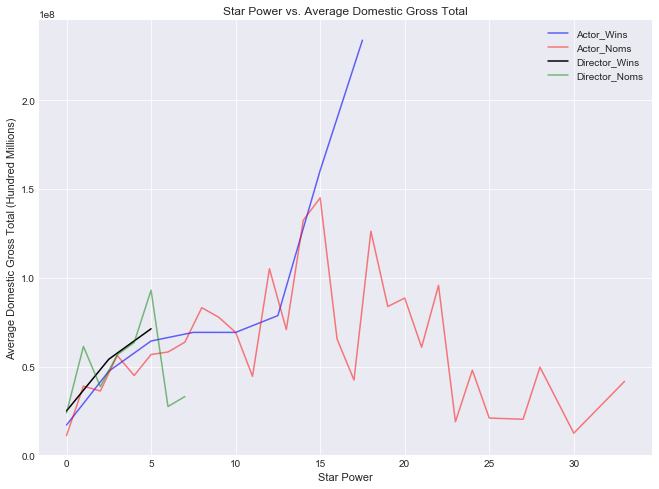

In [1291]:
average_actor_wins = analysis1_df.groupby('actor_wins_power')['domestic_gross'].mean()
#print(average_actor_wins)
average_actor_noms = analysis1_df.groupby('actor_noms_power')['domestic_gross'].mean()
#print(average_actor_noms)
average_dir_wins = analysis1_df.groupby('director_wins_power')['domestic_gross'].mean()
#print(average_dir_wins)
average_dir_noms = analysis1_df.groupby('director_noms_power')['domestic_gross'].mean()
#print(average_dir_noms)

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(average_actor_wins, color='b', alpha=0.6)
ax.plot(average_actor_noms, color='r', alpha=0.5)
ax.plot(average_dir_wins, color='k', alpha=1)
ax.plot(average_dir_noms, color='g', alpha=0.5)
ax.legend(['Actor_Wins', 'Actor_Noms', 'Director_Wins', 'Director_Noms'])
plt.xlabel('Star Power', fontsize=11)
plt.ylabel('Average Domestic Gross Total (Hundred Millions)', fontsize=11)
plt.title('Star Power vs. Average Domestic Gross Total');
plt.savefig('avgstarpoweravg.pdf')


In [1269]:
corr = analysis1_df.corr()
corr

,domestic_gross,actor_wins_power,actor_noms_power,director_wins_power,director_noms_power,total_wins_power,total_noms_power,total_star_power
domestic_gross,1.000000,0.292623,0.320009,0.104944,0.097343,0.293693,0.314106,0.324783
actor_wins_power,0.292623,1.000000,0.762319,0.221954,0.261227,0.969058,0.754468,0.895859
actor_noms_power,0.320009,0.762319,1.000000,0.190671,0.293568,0.744166,0.979306,0.937296
director_wins_power,0.104944,0.221954,0.190671,1.000000,0.586771,0.455764,0.299102,0.386587
director_noms_power,0.097343,0.261227,0.293568,0.586771,1.000000,0.387007,0.480962,0.469782
total_wins_power,0.293693,0.969058,0.744166,0.455764,0.387007,1.000000,0.764449,0.915667
total_noms_power,0.314106,0.754468,0.979306,0.299102,0.480962,0.764449,1.000000,0.959104
total_star_power,0.324783,0.895859,0.937296,0.386587,0.469782,0.915667,0.959104,1.000000


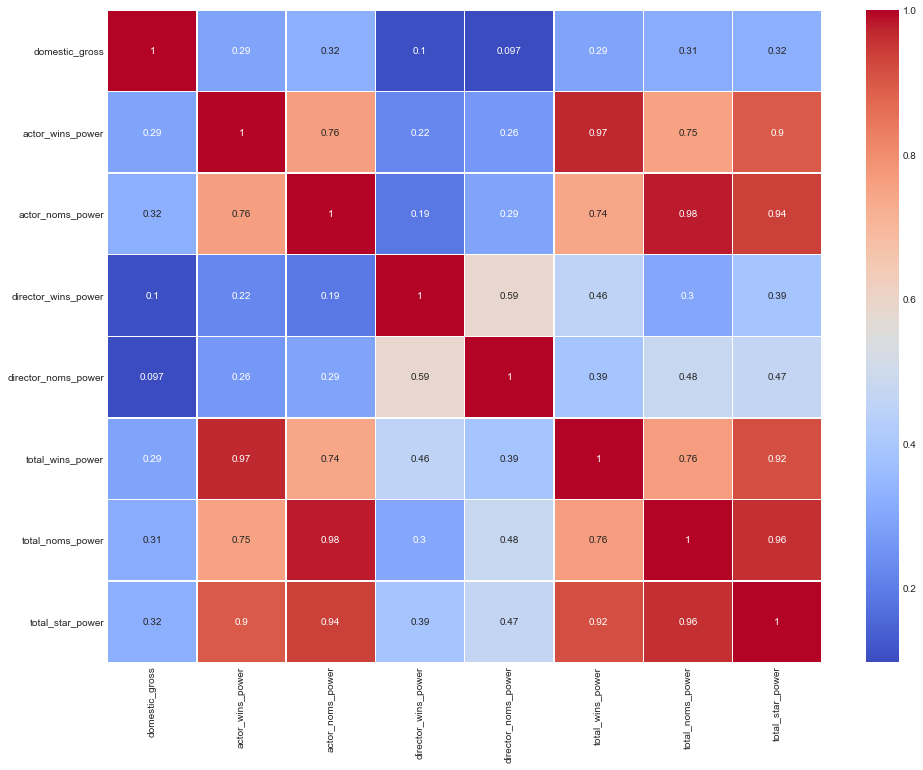

In [1292]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, annot=True)
plt.savefig('heatmap1.pdf')

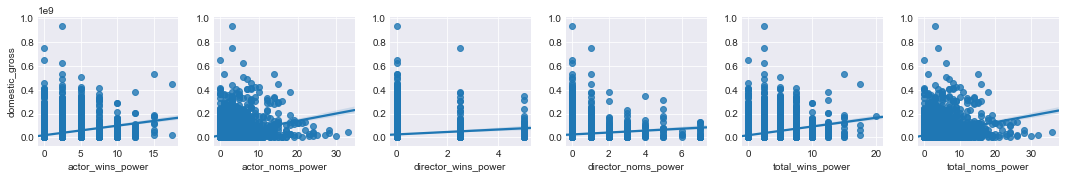

In [1632]:
sns.pairplot(analysis1_df, x_vars=['actor_wins_power', 'actor_noms_power', 
                                   'director_wins_power', 'director_noms_power',
                                  'total_wins_power', 'total_noms_power'],
             y_vars='domestic_gross', kind='reg', size=2.5);

In [1478]:
analysis1_df.columns

Index(['title', 'domestic_gross', 'actor_wins_power', 'actor_noms_power',
       'director_wins_power', 'director_noms_power', 'total_wins_power',
       'total_noms_power', 'total_star_power'],
      dtype='object')

R2 Score: 0.127329623388

[('actor_wins_power', -1.073197734812706e+19),
 ('actor_noms_power', -6.1099479500273877e+19),
 ('director_wins_power', -3.0434898952045036e+18),
 ('director_noms_power', -1.4001570210082638e+19),
 ('total_wins_power', 3.2477245460294558e+19),
 ('total_noms_power', 9.5704868115975062e+19),
 ('total_star_power', -4.7002762558935343e+19)]


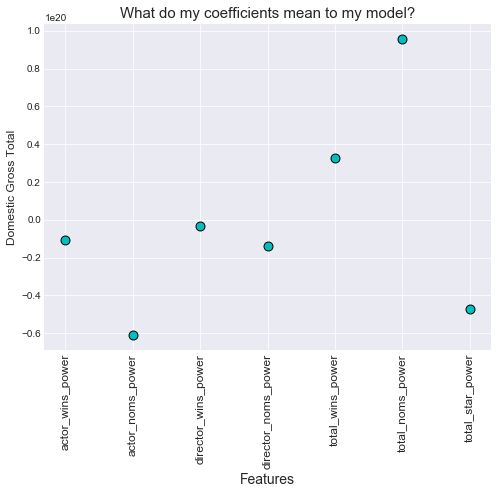

In [1836]:
X = analysis1_df.loc[:, ['actor_wins_power', 'actor_noms_power',
                        'director_wins_power', 'director_noms_power', 
                        'total_wins_power', 'total_noms_power',
                        'total_star_power']]
y = analysis1_df.domestic_gross
#print(X.shape)
#print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

#Standard Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

#Standard scaling on test data as well 
X_test_scaled = scaler.transform(X_test)

#First attempt at regular linreg model, using all features
linreg1 = LinearRegression(normalize=True)
linreg1.fit(X_scaled, y_train)
#R2 Score for this Model  
y_pred = linreg1.predict(X_test_scaled)
print("R2 Score:", metrics.r2_score(y_test, y_pred))
print()
pprint(list(zip(X_test.columns, linreg1.coef_)))

figsize(8, 6)

X_test.columns, linreg1.coef_
ind = range(len(X_test.columns))
plt.scatter(ind, linreg1.coef_, s=80, c='c', edgecolor='k')
plt.xticks(ind, X_test.columns, rotation=90, fontsize=12)
plt.title('What do my coefficients mean to my model?', fontsize=15)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Domestic Gross Total', fontsize=12);

R2 Score: 0.126920744225

[('actor_wins_power', 4897504.6944482252),
 ('actor_noms_power', 14636467.383905251),
 ('director_wins_power', 3466628.036972838),
 ('director_noms_power', -1364916.058984352)]


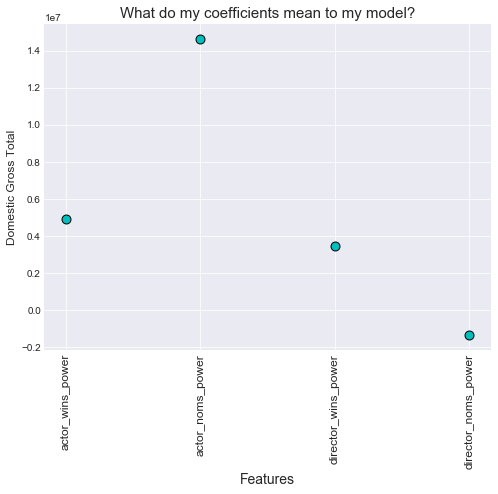

In [1839]:
X = analysis1_df.loc[:, ['actor_wins_power', 'actor_noms_power',
                        'director_wins_power', 'director_noms_power']]
y = analysis1_df.domestic_gross
#print(X.shape)
#print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

#Standard Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

#Standard scaling on test data as well 
X_test_scaled = scaler.transform(X_test)


#First attempt at regular linreg model, using all features
linreg1 = LinearRegression(normalize=True)
linreg1.fit(X_scaled, y_train)
#R2 Score for this Model  
y_pred = linreg1.predict(X_test_scaled)
print("R2 Score:", metrics.r2_score(y_test, y_pred))
print()
pprint(list(zip(X_test.columns, linreg1.coef_)))

figsize(8, 6)

X_test.columns, linreg1.coef_
ind = range(len(X_test.columns))
plt.scatter(ind, linreg1.coef_, s=80, c='c', edgecolor='k')
plt.xticks(ind, X_test.columns, rotation=90, fontsize=12)
plt.title('What do my coefficients mean to my model?', fontsize=15)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Domestic Gross Total', fontsize=12);

In [1840]:
#stats models 
sm_data = X_train.copy()
sm_data['domestic_gross'] = y_train
sm_data
patsy_y, patsy_x = patsy.dmatrices('y_train ~ X_scaled', data=sm_data)

lm = sm.OLS(patsy_y, patsy_x)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     123.1
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           1.53e-99
Time:                        10:53:44   Log-Likelihood:                -82298.
No. Observations:                4272   AIC:                         1.646e+05
Df Residuals:                    4267   BIC:                         1.646e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.643e+07   8.61e+05     30.687      0.000    2.47e+07    2.81e+07
X_scaled[0]  4.898e+06   1.31e+06      3.730      0.000    2.32e+06    7.47e+06
X_scaled[1]  1.464e+07   1.31e+06     11.161      0.000    1.21e+07    1.72e+07
X_scaled[2]  3.467e+06   1.08e+06      3.209      0.001    1.35e+06    5.58e+06
X_scaled[3] -1.365e+06    1.1e+06     -1.242      0.214   -3.52e+06    7.89e+05
==============================================================================
Omnibus:                     4221.834   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           288567.178
Skew:                           4.727   Prob(JB):                         0.00
Kurtosis:                      42.138   Cond. No.                         2.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1322]:
#Using RFECV Method 
estimator = SVR(kernel='linear')
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_train, y_train)
selector.ranking_

array([1, 1, 1, 1])

In [1358]:
#Applying Lasso Regularization 
lasso = Lasso()
MSE_lasso = np.abs(cross_val_score(lasso, X_train, y_train, cv=10))
RMSE_lasso = list(map(np.sqrt, MSE_lasso))
print("10-Fold Average RMSE for lasso regularization:", np.mean(RMSE_lasso))

10-Fold Average RMSE for lasso regularization: 0.317483242969


## Analysis Part 2 - Adding in the rest of my features

Building a model using the other features of my dataset.  
Production Budget, runtime, release month, release year, release season, rating.  
To add these other features into my dataset, I will need to remove the nulls in these columns.  
This will decrease the correlations between my star power features and domestic gross total.  
The main point of this analysis is to see how the star power features stack up against my other features and see the weight that the star power holds against other features such as budget, runtime, rating, etc.   

In [1360]:
##pandas cleaning 
movies_df.fillna(value=np.nan, inplace=True)
movies_df['cast'] = movies_df.cast.astype(str).str.replace('\[|\]|\'', '')
movies_df['cast'] = movies_df.cast.str.replace('\"|\"', '')
movies_df.replace(to_replace='None', value=np.nan, inplace=True)
movies_df.replace('N/A', np.nan, inplace=True)
movies_df['release_year'] = movies_df.release_date.dt.year
movies_df['director'] = movies_df.director.astype(str).str.replace('\[|\]|\'|\"', '')

#Replace blank white space entries with NaN in directors column  
movies_df.director.replace(r'^\s*$', np.nan, regex=True, inplace=True)

#Convert release_year column to int
movies_df['release_year'] = movies_df.release_year.apply(np.int64)
movies_df['release_month'] = movies_df.release_date.dt.month

#Create a seasons column 
movies_df['season'] = movies_df['release_month'].apply(lambda x: (x%12 + 3)//3)
movies_df.director.replace('nan', np.nan, inplace=True)
movies_df.reset_index(inplace=True)
del movies_df['index']
movies_df.drop_duplicates(inplace=True)

In [1365]:
#A high percentage of our 'unrated' MPAA movies are either foreign, documentary, or unknown genre
#I am going to remove those from the DF 
movies_df.groupby(['rating','genre']).count()

title  domestic_gross  distributor  \
rating        genre                                                    
G             Animation              53              53           53   
              Comedy                  4               4            4   
              Concert                 2               2            2   
              Documentary            24              24           24   
              Drama                   1               1            1   
              Family                  5               5            5   
              Family Adventure        2               2            2   
              Family Comedy           7               7            7   
              Fantasy                 2               2            2   
              Fantasy Drama           2               2            2   
              Foreign                 2               2            2   
              IMAX                   15              15           15   
              Musical                 5               5            5   
              Sci-Fi Adventure        1               1            1   
              Sports Drama            2               2            2   
              Unknown                 3               3            3   
              Western                 1               1            1   
NC-17         Comedy / Drama          1               1            1   
              Crime Thriller          1               1            1   
              Documentary             1               1            1   
              Drama                   3               3            3   
              Foreign                 5               5            5   
Not Yet Rated Action                  1               1            1   
              Action / Adventure      1               1            1   
              Action Comedy           1               1            1   
              Comedy                  1               1            1   
              Documentary             4               4            4   
              Drama                   2               2            2   
              Romance                 1               1            1   
              Romantic Comedy         2               2            2   
...                                 ...             ...          ...   
Unrated       Crime Thriller          6               6            6   
              Documentary           350             350          350   
              Drama                 110             110          110   
              Drama / Thriller       13              13           13   
              Fantasy                 4               4            4   
              Fantasy Comedy          1               1            1   
              Fantasy Drama           3               3            3   
              Foreign               555             555          555   
              Foreign / Action       31              31           31   
              Foreign / Horror        3               3            3   
              Historical Drama        6               6            6   
              Horror                 11              11           11   
              Horror Comedy           3               3            3   
              Horror Thriller         2               2            2   
              IMAX                   14              14           14   
              Music Drama             1               1            1   
              Musical                 7               7            7   
              Period Drama            2               2            2   
              Romance                13              13           13   
              Romantic Comedy        13              13           13   
              Romantic Thriller       1               1            1   
              Sci-Fi                  5               5            5   
              Sci-Fi Comedy           2               2            2   
  

In [1366]:
#Removing movies that have foreign, doc., or unknown genres
#keeping only G, PG, PG13, and R movies 
movies_df.drop(movies_df[movies_df.genre == 'Foreign'].index, inplace=True)
movies_df.drop(movies_df[movies_df.genre == 'Documentary'].index, inplace=True)
movies_df.drop(movies_df[movies_df.genre == 'Unknown'].index, inplace=True)
movies_df.drop(movies_df[(movies_df.rating == 'Unrated') | (movies_df.rating == 'Not Yet Rated') |
                          (movies_df.rating == 'NC-17') | (movies_df.rating == 'Unknown')].index, inplace=True)

#Remove any stragglers that contain 'Foreign' in genre 
mask = movies_df['genre'].str.contains("Foreign")
movies_df = movies_df[~mask]
#Remove any rows with a np.nan runtime 
movies_df.dropna(subset = ['run_time'], inplace=True)
movies_df.reset_index(inplace=True)
del movies_df['index']

/Users/Jacob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [1367]:
#Dropping the rows that have NaNs in DTG and prod_budget columns 
movies_df.dropna(subset=['prod_budget'], inplace=True)
movies_df.reset_index(inplace=True)
del movies_df['index']

/Users/Jacob/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1396]:
year_avgs = movies_df.groupby('release_year')['domestic_gross'].mean()
month_avgs = movies_df.groupby('release_month')['domestic_gross'].mean()
season_avgs = movies_df.groupby('season')['domestic_gross'].mean()

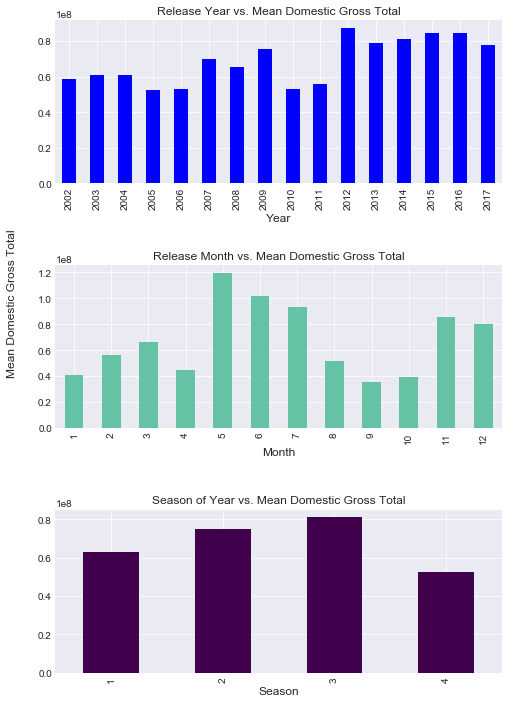

In [1535]:
#Plotting domestic_gross_total by release year, release month, season
#save figures in PDF
fig = plt.figure(figsize=(8, 12))
fig.subplots_adjust(hspace=0.5)
fig.text(0.05, 0.63, 'Mean Domestic Gross Total', ha='center', 
         rotation='vertical', fontsize=12)

plt.subplot(3, 1, 1)
year_avgs.plot(kind='bar', colormap='winter')
plt.title('Release Year vs. Mean Domestic Gross Total')
plt.xlabel('Year', fontsize=12)

plt.subplot(3, 1, 2)
month_avgs.plot(kind='bar', colormap='Set2')
plt.title('Release Month vs. Mean Domestic Gross Total')
plt.xlabel('Month', fontsize=12)

plt.subplot(3, 1, 3)
season_avgs.plot(kind='bar', colormap='PRGn')
plt.title('Season of Year vs. Mean Domestic Gross Total')
plt.xlabel('Season', fontsize=12);
plt.savefig('timesavgs.pdf')

Removing all production budget Nulls decreases my star_power field correlations from ~0.3+ to 0.16 - 0.18

In [1407]:
#Creating dummies for rating column - merge to original dataframe 
rating_dummies = pd.get_dummies(movies_df['rating'])
movies_df = pd.concat((movies_df, rating_dummies), axis=1)
del movies_df['G']

In [1408]:
#creating dummies for season column - merge to original dataframe
season_dummies = pd.get_dummies(movies_df['season'])
season_dummies.rename(columns={2: 'Spring', 3: 'Summer', 4: 'Autumn'}, inplace=True)
movies_df = pd.concat((movies_df, season_dummies), axis=1)
del movies_df[1]

In [1409]:
#Creating dummies for month column - merge to original dataframe
month_dummies = pd.get_dummies(movies_df['release_month'])
del month_dummies[1]
movies_df = pd.concat((movies_df, month_dummies), axis=1)

In [1410]:
pd.set_option('max_columns', 50)

In [1411]:
movies_df.columns

Index([              'title',      'domestic_gross',         'distributor',
          'actor_wins_power',    'actor_noms_power', 'director_wins_power',
       'director_noms_power',    'total_wins_power',    'total_noms_power',
                      'cast',            'director',         'prod_budget',
                     'genre',              'rating',        'release_date',
                  'run_time',    'total_star_power',        'release_year',
             'release_month',              'season',                  'PG',
                     'PG-13',                   'R',              'Spring',
                    'Summer',              'Autumn',                     2,
                           3,                     4,                     5,
                           6,                     7,                     8,
                           9,                    10,                    11,
                          12],
      dtype='object')

In [4]:
#analysis2 = movies_df.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 11, 14, 15, 
#                               16, 17, 20, 21, 22, 23, 24,
#                               25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]]
#analysis2

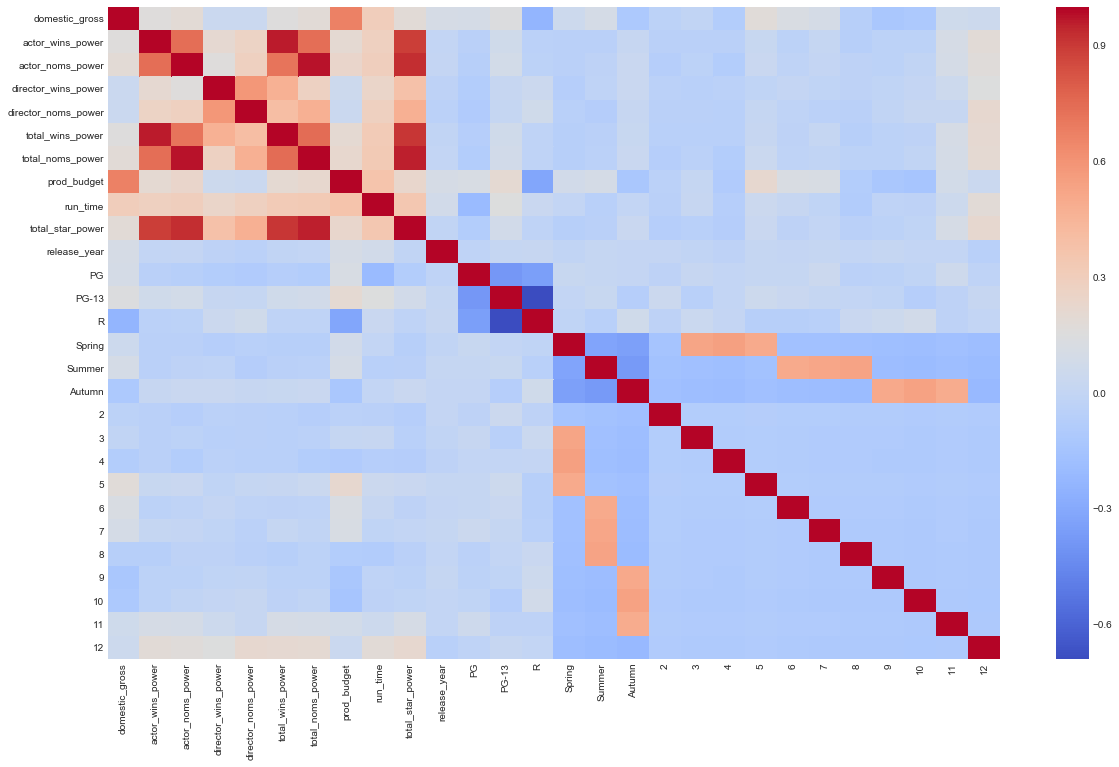

In [1437]:
plt.figure(figsize=(20, 12))
sns.heatmap(analysis2.corr(), cmap='coolwarm');

In [1557]:
analysis2.columns

Index([              'title',      'domestic_gross',    'actor_wins_power',
          'actor_noms_power', 'director_wins_power', 'director_noms_power',
          'total_wins_power',    'total_noms_power',         'prod_budget',
              'release_date',            'run_time',    'total_star_power',
              'release_year',                  'PG',               'PG-13',
                         'R',              'Spring',              'Summer',
                    'Autumn',                     2,                     3,
                           4,                     5,                     6,
                           7,                     8,                     9,
                          10,                    11,                    12],
      dtype='object')

In [1664]:
#cross validation on analysis2 dataset

X_2 = analysis2.iloc[:, [2, 3, 4, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]
y_2 = analysis2.iloc[:, 1]

print(X_2.shape)
print(y_2.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.3)


#Standard Scaling on certain features 
scaled_features = X_train2.copy()
col_names = ['actor_wins_power', 'actor_noms_power', 'director_wins_power',
             'director_noms_power', 'prod_budget', 'run_time', 'release_year']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values) #fitting the scaler on training data 
features = scaler.transform(features.values)   #Actually transform the columns 

scaled_features[col_names] = features
scaled_features

#Standard scaling on test data as well 
scaled_features_test = X_test2.copy()
features_test = scaled_features_test[col_names]
features_test = scaler.transform(features_test.values)

scaled_features_test[col_names] = features_test
#scaled_features_test

(2001, 24)
(2001,)


In [1665]:
#Regression 
linreg2 = LinearRegression()
linreg2.fit(scaled_features, y_train2)
print(linreg2.score(scaled_features_test, y_test2))
print()
#Intepreting coefficients 
list(zip(scaled_features_test.columns, linreg2.coef_))

0.441554511563



[('actor_wins_power', -353445.84391180828),
 ('actor_noms_power', 2369069.0566085465),
 ('director_wins_power', -3409453.001144981),
 ('director_noms_power', 1239516.8668435067),
 ('prod_budget', 46048679.222807348),
 ('run_time', 7359648.0092908721),
 ('release_year', 1930962.5010332025),
 ('PG', -15068317.487192541),
 ('PG-13', -22003688.485434953),
 ('R', -29226323.991417848),
 ('Spring', 1999219.1148025151),
 ('Summer', 6673592.1508420501),
 ('Autumn', -2553622.1546160523),
 (2, 1690541.1311869984),
 (3, -4964197.4888799824),
 (4, -4737647.3268705709),
 (5, 11701063.930553056),
 (6, 12340445.458982754),
 (7, -1670372.8032368068),
 (8, -3996480.5049038851),
 (9, -6057489.6832907032),
 (10, -784446.35189360054),
 (11, 4288313.8805682342),
 (12, -1840861.727272192)]

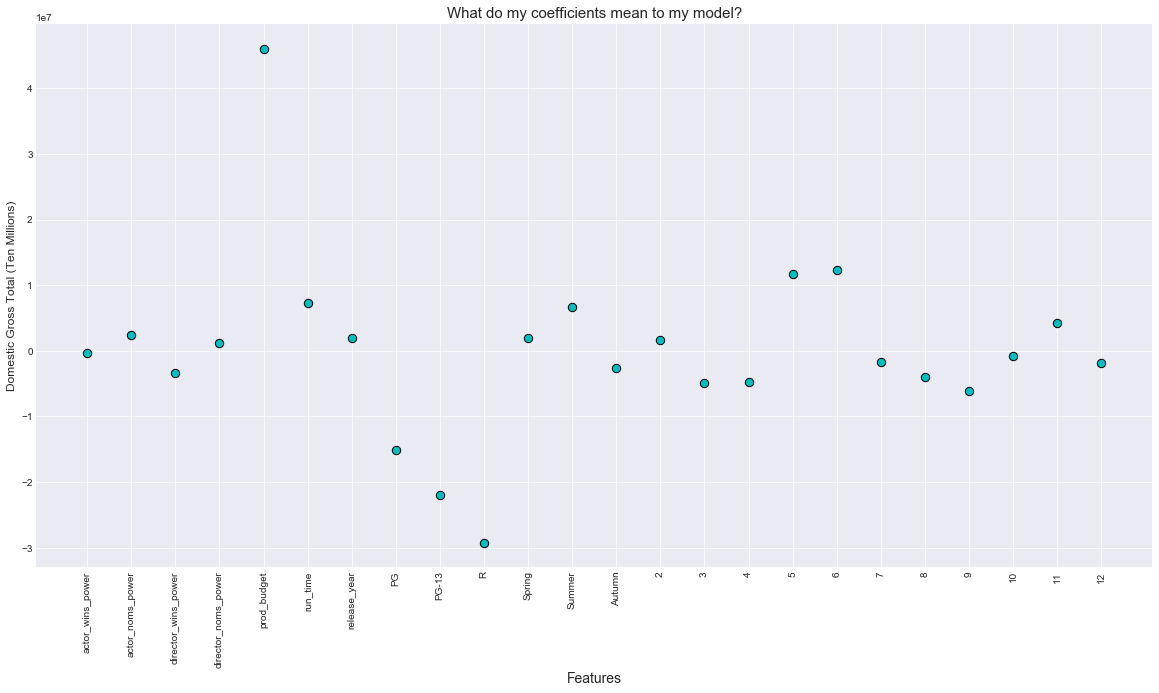

In [1666]:
#First attempt - before regularization 
figsize(20,10)

X_test2.columns, linreg2.coef_
ind = range(len(scaled_features_test.columns))
plt.scatter(ind, linreg2.coef_, s=70, c='c', edgecolor='k')
plt.xticks(ind, scaled_features_test.columns, rotation=90)
plt.title('What do my coefficients mean to my model?', fontsize=15)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Domestic Gross Total (Ten Millions)', fontsize=12);

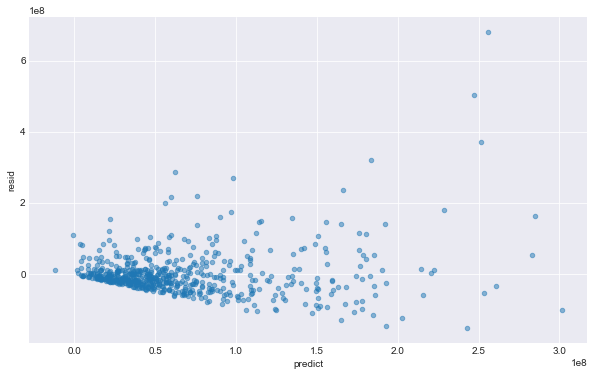

In [1667]:
#Plotting residuals vs predictions 
data = scaled_features_test.copy()
data['predict'] = linreg2.predict(scaled_features_test)
data['resid'] = y_test2 - data.predict
with sns.axes_style('darkgrid'):
    plot=data.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.5,figsize=(10,6))

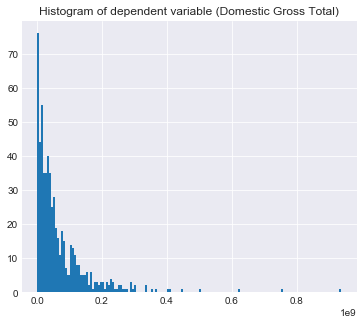

In [1668]:
figsize(6, 5)
y_test2.hist(bins=150)
plt.title('Histogram of dependent variable (Domestic Gross Total)');

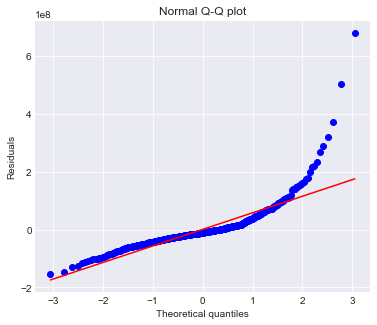

In [1669]:
import scipy.stats as stats
stats.probplot(data['resid'], plot=plt)
plt.title("Normal Q-Q plot")
plt.ylabel('Residuals');

#### I want to apply lasso to this data now to figure out which features are most important for predicting domestic total.
`LassoCV()`

In [1670]:
lcv = LassoCV(cv=10)
lcv.fit(scaled_features, y_train2)
print("R2 Score with LassoCV:", lcv.score(scaled_features_test, y_test2))
list(zip(scaled_features_test.columns, lcv.coef_))

R2 Score with LassoCV: 0.442907454293


[('actor_wins_power', 0.0),
 ('actor_noms_power', 1951503.8846076198),
 ('director_wins_power', -2734656.5816380042),
 ('director_noms_power', 591634.05569312931),
 ('prod_budget', 47141116.215267085),
 ('run_time', 6470851.0744768381),
 ('release_year', 1571297.6824867323),
 ('PG', 0.0),
 ('PG-13', -4540063.1520050885),
 ('R', -11809939.433810428),
 ('Spring', -0.0),
 ('Summer', 4319643.2550521046),
 ('Autumn', -249344.01634975942),
 (2, 0.0),
 (3, -0.0),
 (4, -0.0),
 (5, 10471234.910649493),
 (6, 12085036.084180227),
 (7, 0.0),
 (8, -0.0),
 (9, -5212474.4074050682),
 (10, -0.0),
 (11, 0.0),
 (12, -0.0)]

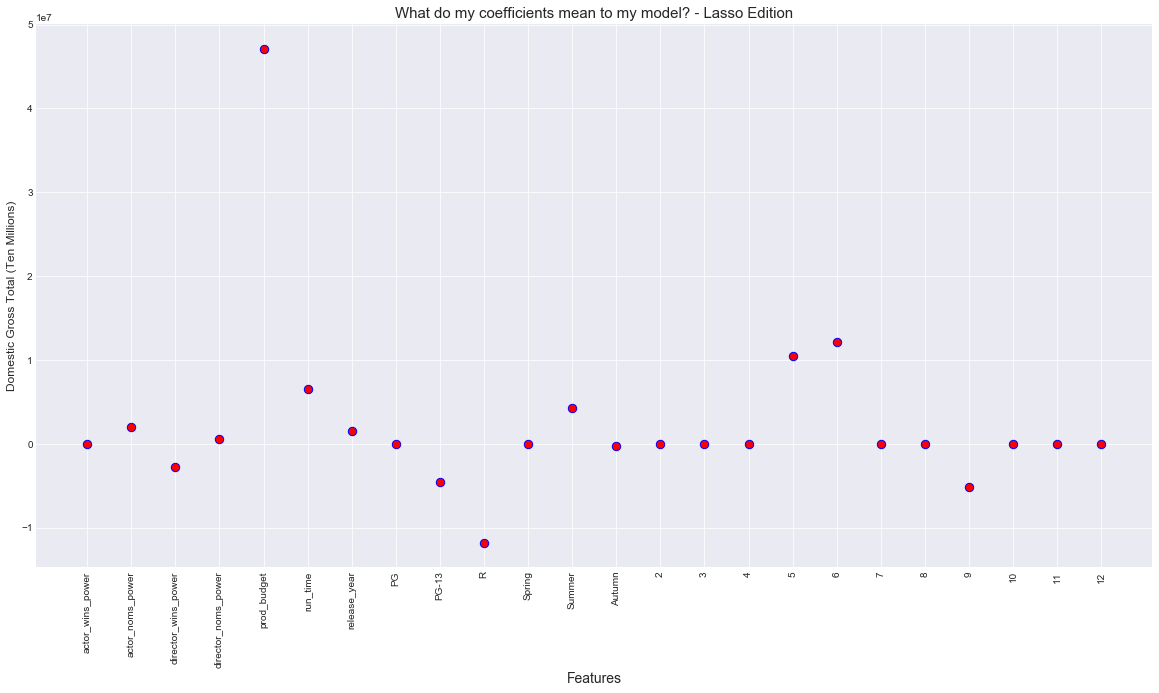

In [1671]:
#Second attempt - post lasso 
figsize(20,10)

scaled_features_test.columns, lcv.coef_
ind = range(len(scaled_features_test.columns))
plt.scatter(ind, lcv.coef_, s=70, c='r', edgecolor='b')
plt.xticks(ind, scaled_features_test.columns, rotation=90)
plt.title('What do my coefficients mean to my model? - Lasso Edition', fontsize=15)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Domestic Gross Total (Ten Millions)', fontsize=12);

In [1672]:
pred = pd.Series(lcv.predict(scaled_features_test))
real = pd.DataFrame(y_test2)
real['pred'] = pred
real.isnull().sum()

domestic_gross      0
pred              434
dtype: int64

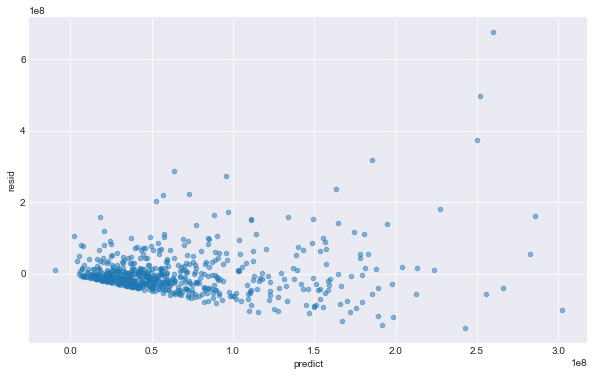

In [1673]:
data2 = scaled_features_test.copy()
data2['predict'] = lcv.predict(scaled_features_test)
data2['resid'] = y_test2 - data2.predict
with sns.axes_style('darkgrid'):
    plot=data2.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.5,figsize=(10,6))

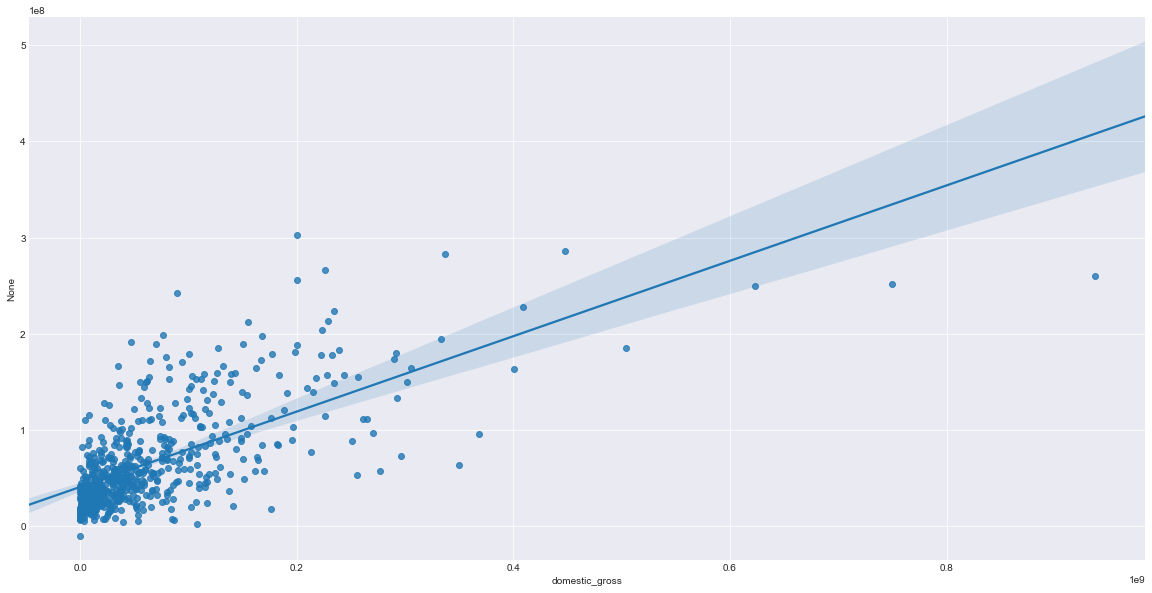

In [1675]:
sns.regplot(y_test2, pred)

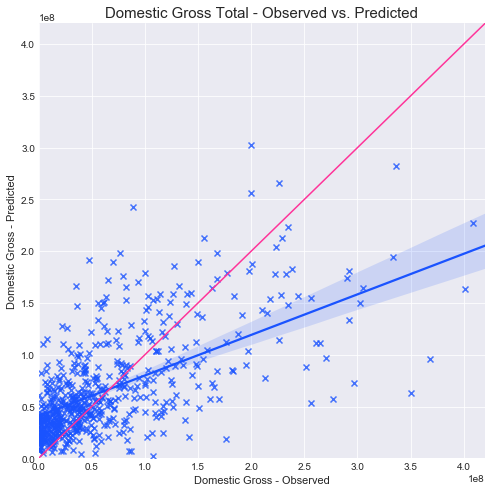

In [1724]:
color_object = ['#1a53ff', "#ff3399"]
sns.set_palette(color_object, n_colors=2)
plt.figure(figsize=(8,8))
plt.title('Domestic Gross Total - Observed vs. Predicted',size=15)
sns.regplot(y_test2, pred,marker="x", fit_reg=True)
plt.xlabel("Domestic Gross - Observed", size=11)
plt.ylabel("Domestic Gross - Predicted", size=11)
plt.xlim(0, 420000000)
plt.ylim(0, 420000000)
x = np.linspace(0, 4200000000, 1000)
plt.plot(x, x + 0, linestyle='solid');

In [1787]:
movies_df2['total_star_power'] = movies_df2.total_wins_power + movies_df2.total_noms_power

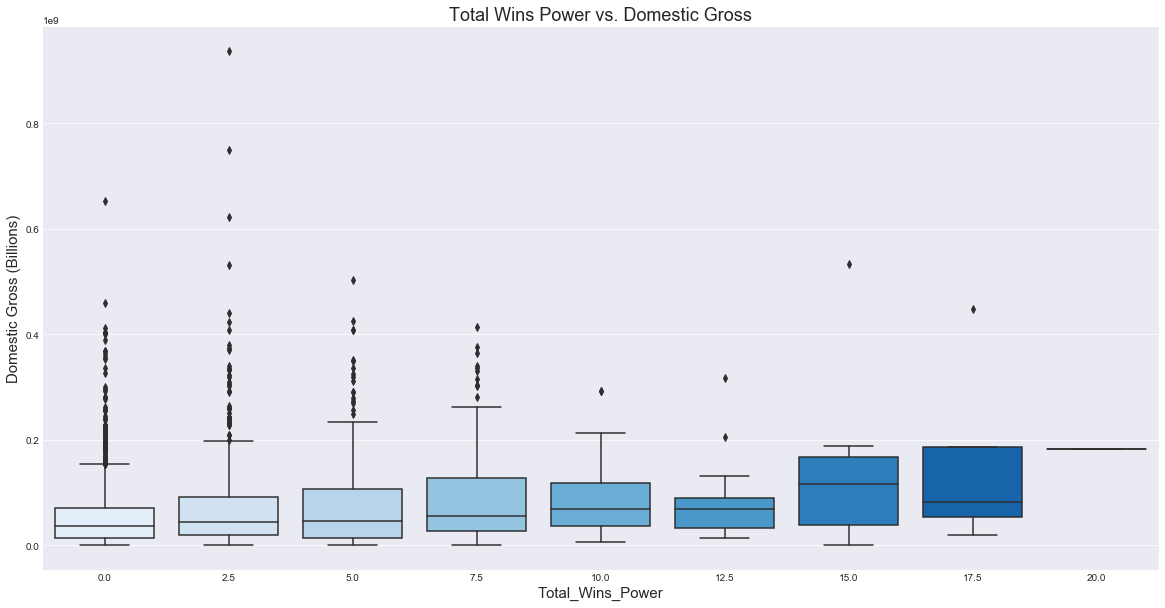

In [1833]:
sns.boxplot(x='total_wins_power', y='domestic_gross', data=movies_df, saturation=1, palette='Blues')
plt.xlabel('Total_Wins_Power', size=15)
plt.ylabel('Domestic Gross (Billions)', size=15)
plt.title('Total Wins Power vs. Domestic Gross', size=18)
plt.savefig('boxandwhisk2.pdf');

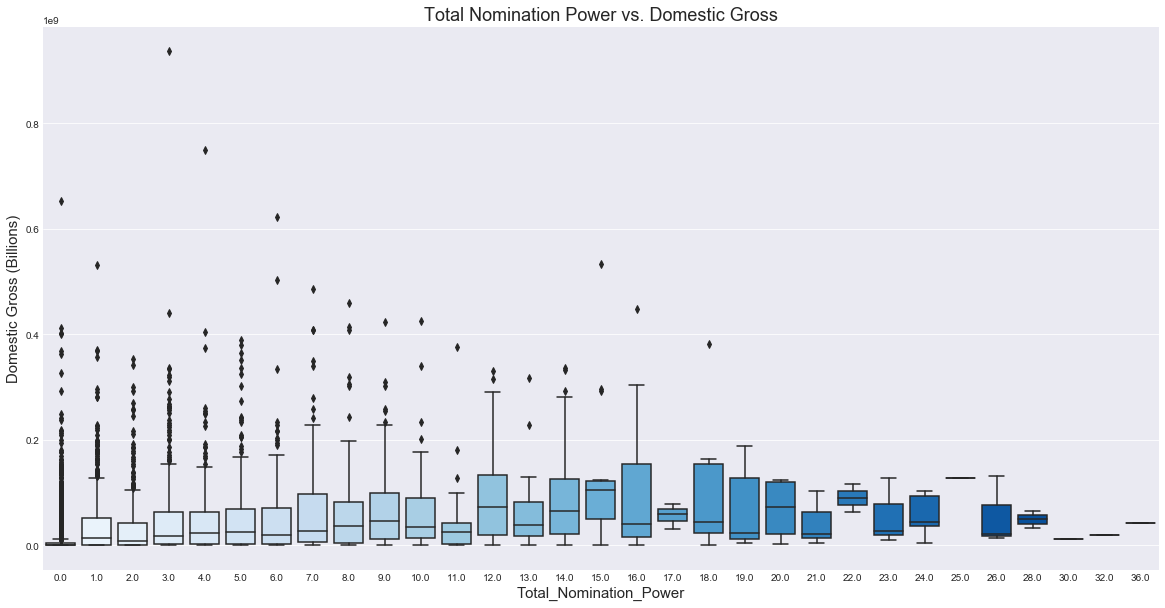

In [1820]:
#Movies with some win power vs. no win power
sns.boxplot(x='total_noms_power', y='domestic_gross', data=movies_df2, saturation=1, palette="Blues")
plt.title("Total Nomination Power vs. Domestic Gross", size=18)
plt.xlabel('Total_Nomination_Power', size=15)
plt.ylabel('Domestic Gross (Billions)', size=15);
plt.savefig('boxnwhisk.pdf')
#sns.boxplot(x='total_noms_power', y='domestic_gross', data=movies_df)